## Feature Importance in Random Forest
 
In this exercise, the Pima Indian dataset is used to develop a Random Forest model to predict whether a patient has diabetes or not. Further, explore different methods to get the features' importance using the trained model.

First, you will import all the relevant packages.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [3]:
# Next, let us load the Pima Indian dataset into a data frame.
pima_dataset = pd.read_csv('diabetes.csv')
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The intuition of any ML model is to work well on unseen data. To make sure that the trained model is robust, you first divide the data into 2 sets - Training and Test sets. The training set is used to train the model and then we evaluate the trained model on the unseen test set to check the robustness of the model. Let us first split the data into 2 sets in a stratified manner.

In [4]:
X = pima_dataset.drop(['Outcome'], axis=1)
y = pima_dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [5]:
# Inspect whether the 2 sets are indeed stratified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0    0.651466
1    0.348534
Name: Outcome, dtype: float64
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


Now, let us instantiate the Random Forest model with all the hyperparameters and train the model using the training data.

In [6]:
# Train model using the best parameters (learned in previous exercise) - max_depth=5, n_estimators=100
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

Calculate the ROC AUC performance metric using the trained model on the training data and test data. ROC AUC performance metric is widely used to calculate the performance of binary classification models.

In [7]:
## Get the probability of predicting 1 on training data
y_pred = rf_model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)

## Get the probability of predicting 1 on test data
y_pred = rf_model.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, y_pred)

print('Training Dataset ROC AUC Score: ' + str(auc_train), ', Test Dataset ROC AUC Score: ' + str(auc_test))

Training Dataset ROC AUC Score: 0.9397780373831776 , Test Dataset ROC AUC Score: 0.8092592592592592


<BarContainer object of 8 artists>

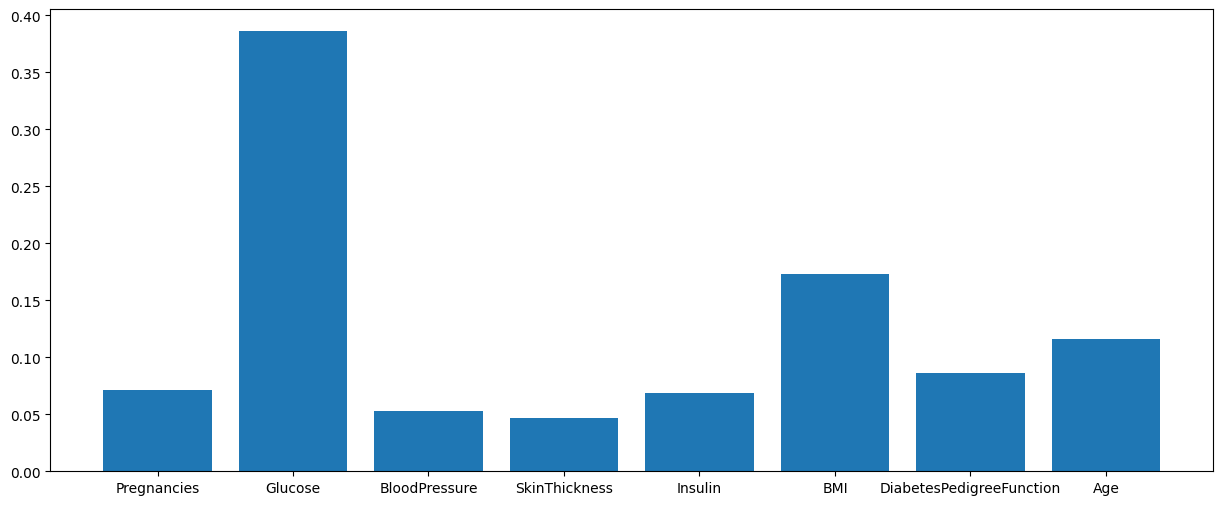

In [8]:
# Plot the feature importance of each feature calculated by the Random Forest model.
plt.figure(figsize=(15,6))
feature_importances = rf_model.feature_importances_
plt.bar(X_train.columns, feature_importances)

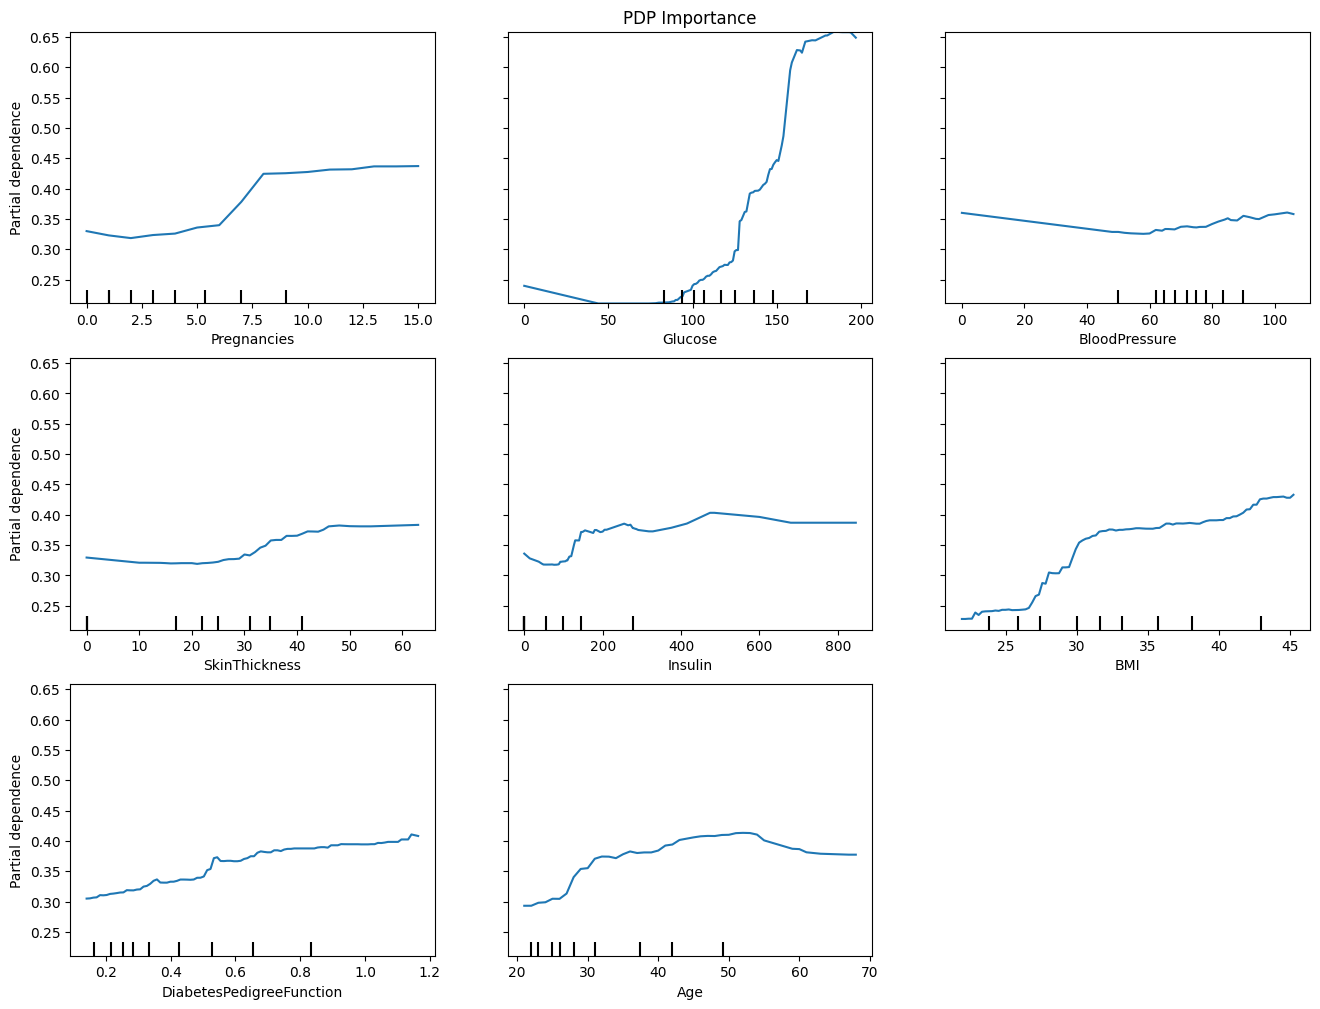

In [9]:
# Now, let us use the Partial dependency method to plot the feature importance.
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_title("PDP Importance")
pdp_features = X_test.columns

PartialDependenceDisplay.from_estimator(rf_model, X_test, pdp_features, ax=ax);

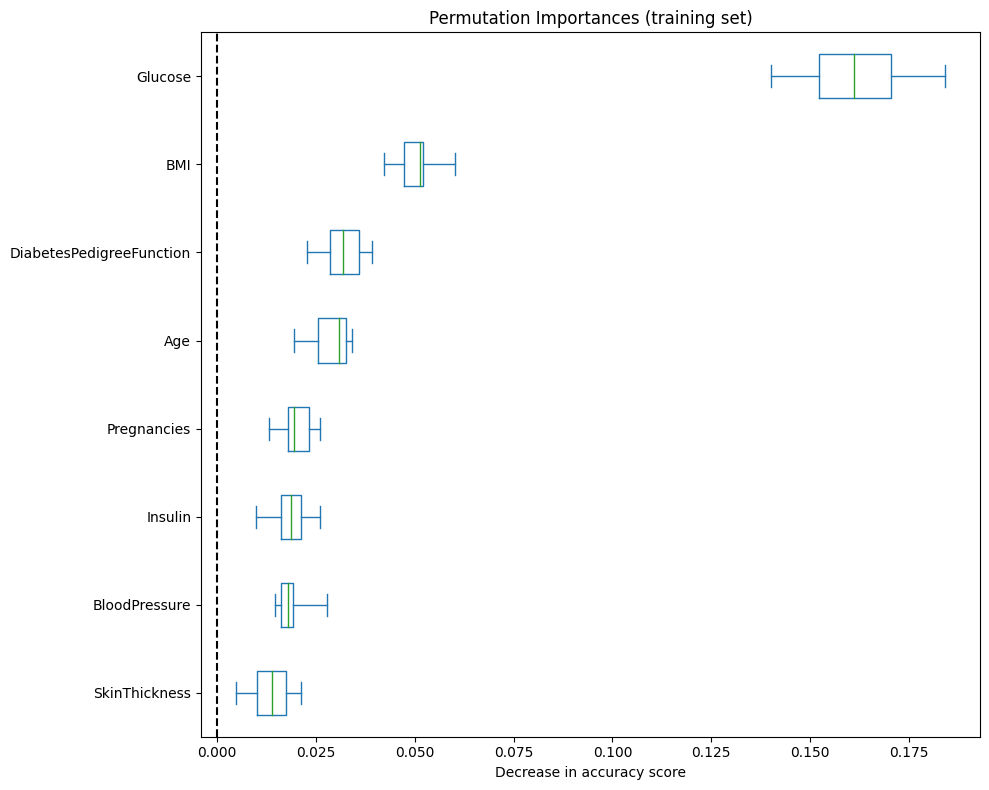

In [10]:
# Finally, the Permutation Importance method is also used to calculate the feature importance of each of the features using the trained model.
result = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10, figsize = (10,8))
ax.set_title("Permutation Importances (training set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In this exercise, you have learned to develop a Random Forest model. Further, you have also learned to get the feature importance using several methods. These features’ importance will help us to intuitively understand which features help the model in prediction and also the features which are not that important for the model development.